In [1]:
%matplotlib inline
from load_data import load_similarity_matrices
import matplotlib.pyplot as plt
import numpy as np
import collections

# Oto są kolory "Tableau 20" w RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Przeskaluj wartości RGB to skali [0, 1], by była akceptowana przez matplotliba.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
bin_sim, scale_sim, mapping_idx_chembl = \
    load_similarity_matrices('data/Similarity.csv', 'data/Random_compounds_100.sdf', 'data/pairs')
bin_sim_no_identity = bin_sim - np.identity(bin_sim.shape[0])
scale_sim_no_identity = scale_sim - 5*np.identity(scale_sim.shape[0])

# print 'bin_sim\n', bin_sim
# print '\nscale_sim\n', scale_sim
# print '\nmapping_idx_chembl\n', mapping_idx_chembl

21 pairs were omitted


/home/nex/Libraries/anaconda/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


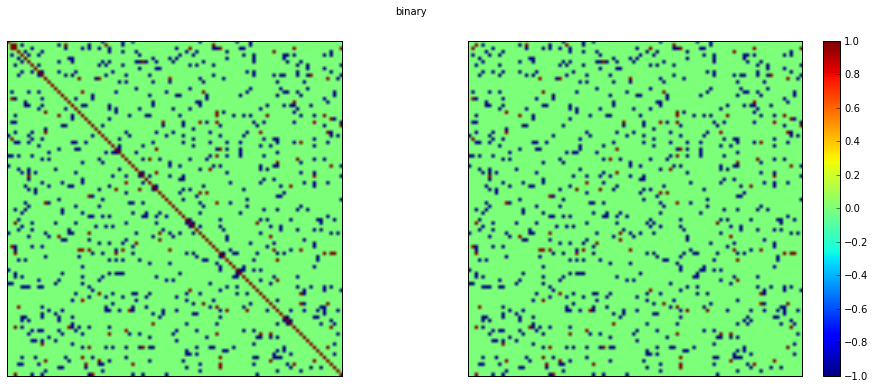

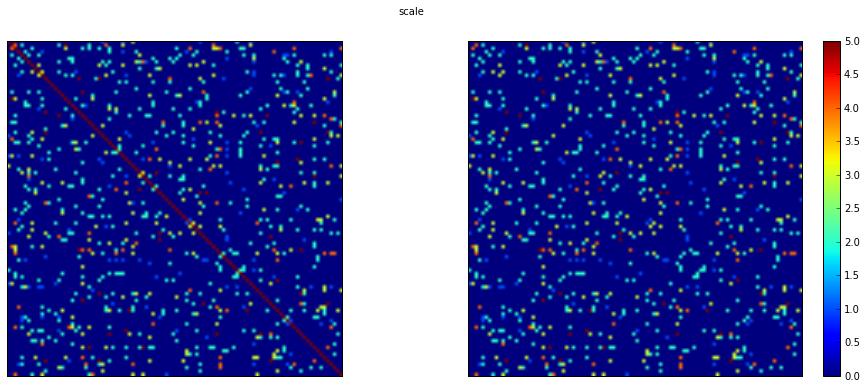

In [3]:
### PROSTA WIZUALIZACJA JAKO OBRAZKI
def data_as_image(with_diag, no_diag, title):
    # good ratio: 11x4
    plt.figure(figsize=(16.5, 6))
    plt.suptitle(title)
    
    plt.subplot(121)
    plt.imshow(with_diag.todense())

    # chcemy nie mieć ticksów
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',         # ticks along the top edge are off
        bottom='off',      # ticks along the botton edge are off
        labelbottom='off')  # labels along the bottom edge are on

    plt.tick_params(
        axis='y',          # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the left edge are off
        right='off',       # ticks along the right edge are off
        labelleft='off')   # labels along the bottom edge are off

    plt.subplot(122)
    plt.imshow(no_diag)

    # chcemy nie mieć ticksów
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',         # ticks along the top edge are off
        bottom='off',      # ticks along the botton edge are off
        labelbottom='off')  # labels along the bottom edge are on

    plt.tick_params(
        axis='y',          # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the left edge are off
        right='off',       # ticks along the right edge are off
        labelleft='off')   # labels along the bottom edge are off

    plt.colorbar()
    plt.show()

data_as_image(bin_sim, bin_sim_no_identity, "binary")
data_as_image(scale_sim, scale_sim_no_identity, 'scale')

In [4]:
## PROCENT WYPEŁNIENIA (pamietaj ze macierz symetryczna)

# dzielenie przez 2 bo macierz symetryczna
bin_nonzero = len(bin_sim_no_identity.nonzero()[0])/2
print bin_nonzero
# maks - half of matrix minus diag
maximal_bin = ((bin_sim_no_identity.shape[0]-1)**2)/2
print maximal_bin
print float(bin_nonzero)/maximal_bin

# dzielenie przez 2 bo macierz symetryczna
scale_nonzero = len(scale_sim_no_identity.nonzero()[0])/2
print scale_nonzero
maximal_scale = ((scale_sim_no_identity.shape[0]-1)**2)/2
print maximal_scale
print float(scale_nonzero)/maximal_scale

429
4900
0.0875510204082
429
4900
0.0875510204082


binary {1.0: 59, -1.0: 370}
scale {1.0: 56, 2.0: 224, 3.0: 90, 4.0: 37, 5.0: 22}


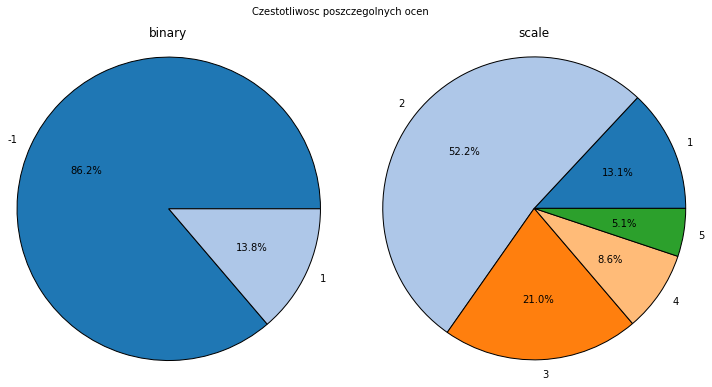

In [5]:
unique_bin, counts_bin = np.unique(np.array(bin_sim_no_identity), return_counts=True)
# bo macierz symetryczna
counts_bin = counts_bin/2
counts_bin = np.delete(counts_bin, np.where(unique_bin==0.0))
unique_bin = np.delete(unique_bin, np.where(unique_bin==0.0))
print 'binary', dict(zip(unique_bin, counts_bin))

unique_scale, counts_scale = np.unique(np.array(scale_sim_no_identity), return_counts=True)
# bo macierz symetryczna
counts_scale = counts_scale/2
counts_scale = np.delete(counts_scale, np.where(unique_scale==0.0))
unique_scale = np.delete(unique_scale, np.where(unique_scale==0.0))
print 'scale', dict(zip(unique_scale, counts_scale))

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(counts_bin, labels=[int(x) for x in unique_bin], autopct='%1.1f%%', colors=tableau20)
plt.axis('equal')
plt.title('binary')

plt.subplot(122)
plt.pie(counts_scale, labels=[int(x) for x in unique_scale], autopct='%1.1f%%', colors=tableau20)
plt.axis('equal')
plt.title('scale')
plt.suptitle('Czestotliwosc poszczegolnych ocen')
plt.show()



# binary versus scale data

In [6]:
def dopasowania(slownik_dopasowan, title):
    plt.figure(figsize=(12, 5))
    plt.suptitle(title)
    for en, key in enumerate(slownik_dopasowan):
        counts = []
        labels = []
        for kkey in slownik_dopasowan[key]:
            counts.append(slownik_dopasowan[key][kkey])
            labels.append(kkey)
        plt.subplot(1, len(slownik_dopasowan.keys()), en+1)
        plt.title(key)
        plt.axis('equal')
        colors = [((float(i+2)/7), (float(i+2)/7), (float(i+2)/7)) for i in labels]
        # uncomment the line below for colourful version
#         colors = [tableau20[i+1] for i in labels]
        plt.pie(counts, labels=labels, colors=colors)
    plt.show()


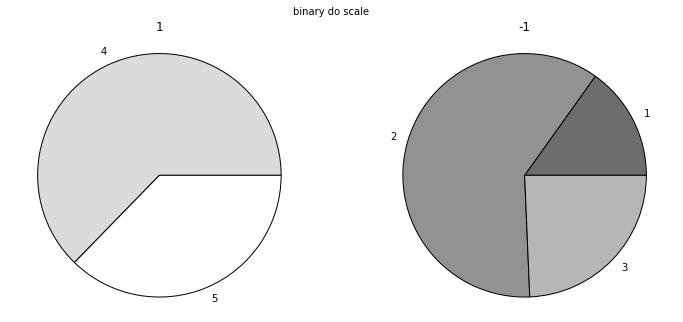

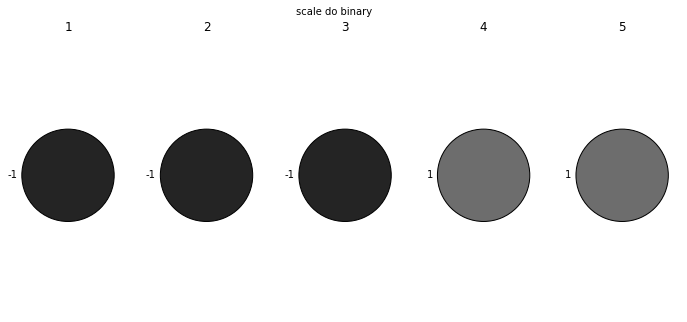

In [7]:
# jeśli para ma ocenę x w scale to jakie ma oceny w bin i vice versa

bi_sc_dict = {}
sc_bi_dict = {}
for i, j in zip(*bin_sim_no_identity.nonzero()):
    bi = bin_sim[i, j]
    sc = scale_sim[i, j]
    if bi not in bi_sc_dict:
        bi_sc_dict[bi] = []
    bi_sc_dict[bi].append(sc)
    if sc not in sc_bi_dict:
        sc_bi_dict[sc] = []
    sc_bi_dict[sc].append(bi)
    
import collections

for key in bi_sc_dict:
    bi_sc_dict[key] = collections.Counter(bi_sc_dict[key])

for key in sc_bi_dict:
    sc_bi_dict[key] = collections.Counter(sc_bi_dict[key])

dopasowania(bi_sc_dict, 'binary do scale')
dopasowania(sc_bi_dict, 'scale do binary')

# jak się mają do siebie nieunikatowe pary?

In [8]:
# kolorowanie tabelek
import matplotlib as mpl

def colourful_table(data, row_labels, col_labels, title):
    # normalizator do kolorowania
    normal = mpl.colors.Normalize(0.5*data.min(), 1.5*data.max())

    fig = plt.figure(figsize=(0.5*data.shape[0], 0.35*data.shape[1]))
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title(title)
    the_table = plt.table(
                    cellText=data,
                    rowLabels=row_labels,
                    colLabels = col_labels,
                    loc='center', 
                    cellColours=plt.cm.hsv(normal(data))
                )
    plt.show()


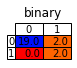

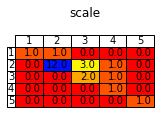

In [9]:
from load_data import find_non_unique_pairs, get_chembls, get_all_files
from pandas import DataFrame
import itertools

folder_with_pairs = 'data/pairs'
dict_idx_chemblchembl = dict([[int(''.join(c for c in filename if c.isdigit())), tuple(get_chembls(filename))]
                                  for filename in get_all_files(folder_with_pairs)])
_, non_unique_file_numbers = find_non_unique_pairs(dict_idx_chemblchembl, file_numbers=True)

df = DataFrame.from_csv('data/Similarity.csv', header=-1, index_col=None)
df.columns = ['filenumber', '0-1', '1-5']

for key in non_unique_file_numbers.keys():
    non_unique_file_numbers[key] = tuple(set([key]+list(non_unique_file_numbers[key])))
non_unique_file_numbers = non_unique_file_numbers.values()

binary = []
scale = []
for tup in non_unique_file_numbers:
    pffff = []
    row = df.loc[df['filenumber'].isin(tup)]
    scale.append(row['1-5'].as_matrix())
    binary.append(row['0-1'].as_matrix())

binary_pairs = []
for nple in binary:
    binary_pairs.extend(list(itertools.combinations(nple, 2)))
binary_pairs = [tuple(sorted(x)) for x in binary_pairs]
    
scale_pairs = []
for nple in scale:
    scale_pairs.extend(list(itertools.combinations(nple, 2)))
scale_pairs = [tuple(sorted(x)) for x in scale_pairs]

binary_counter = collections.Counter(binary_pairs)
scale_counter = collections.Counter(scale_pairs)

def plotting_missnoting(counter, title):
    minimum = min([x for tup in counter.keys() for x in tup])
    maximum = max([x for tup in counter.keys() for x in tup])
    data = np.zeros((maximum+1, maximum+1))
    for i, j in counter.keys():
        data[i, j] = counter[(i, j)]

    data = data[minimum:,minimum:]
    indices = range(minimum, maximum+1)
    
    colourful_table(data, indices, indices, title)
    
plotting_missnoting(binary_counter, 'binary')
plotting_missnoting(scale_counter, "scale")